# BANK CUSTOMERS RETIREMENT PREDICTIONS [ SUPPORT VECTOR MACHINES]


# PROBLEM STATEMENT

Implement a Machine Learning Model as a data scientist at a major bank in NYC where I got a task to develop a model that can predict whether a customer is able to retire or not based on his/her features. Features are his/her age and net 401K savings (retirement savings in the U.S.).

# IMPORTING DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
bank = pd.read_csv('Bank_Customer_retirement.csv')
bank.head()

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1


In [3]:
bank.shape

(500, 4)

In [4]:
bank.head()

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1


In [5]:
bank.tail()

,Customer ID,Age,401K Savings,Retire
495,495,46.678128,704243.0776,1
496,496,43.545007,483175.9998,0
497,497,46.476724,354919.1987,0
498,498,50.903631,639789.9219,1
499,499,38.590586,491310.0096,0


# VISUALIZING THE DATA

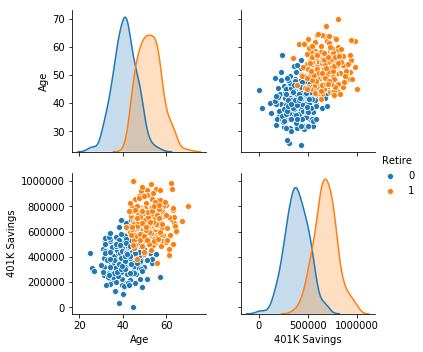

In [6]:
sns.pairplot(bank, hue = 'Retire', vars = ['Age', '401K Savings'] )

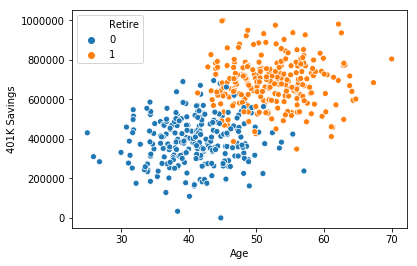

In [7]:
sns.scatterplot(bank['Age'],bank['401K Savings'],hue=bank['Retire'])

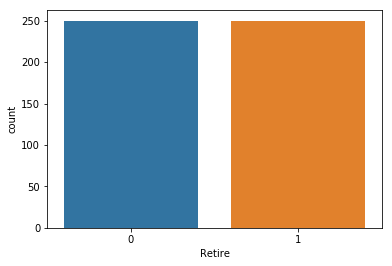

In [8]:
sns.countplot(bank['Retire'], label = "Retirement") 

# MODEL TRAINING 

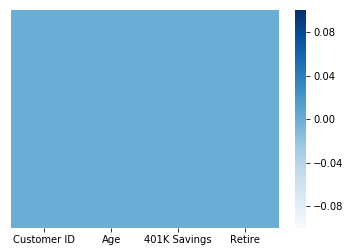

In [9]:
sns.heatmap(bank.isnull(),yticklabels = False, cbar = True, cmap = "Blues")

In [10]:
bank= bank.drop(['Customer ID'],axis=1)

In [11]:
bank
X = bank.iloc[:,:-1]
y = bank.iloc[:,2]

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20 ,random_state=17)

In [13]:
from sklearn.svm import SVC 
classifier = SVC()
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

#  EVALUATING THE MODEL

In [14]:
y_pred = classifier.predict(X_test)

0.52


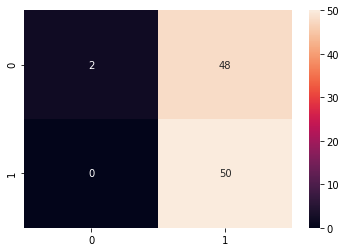

In [15]:
from sklearn.metrics import accuracy_score ,classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
print(accuracy_score(y_test, y_pred))

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.04      0.08        50
           1       0.51      1.00      0.68        50

   micro avg       0.52      0.52      0.52       100
   macro avg       0.76      0.52      0.38       100
weighted avg       0.76      0.52      0.38       100



# IMPROVING THE MODEL

In [17]:
X_train_min = X_train.min()
X_train_min

Age             25.0
401K Savings    10.0
dtype: float64

In [18]:
X_train_max = X_train.max()
X_train_max

Age                  70.0
401K Savings    1000000.0
dtype: float64

In [19]:
X_train_range = (X_train_max - X_train_min)
X_train_range

Age                 45.0
401K Savings    999990.0
dtype: float64

In [20]:
X_train_scaled = (X_train - X_train_min)/X_train_range
X_train_scaled

,Age,401K Savings
68,0.441558,0.416271
286,0.306629,0.316404
371,0.471420,0.450508
203,0.137994,0.388346
398,0.486378,0.731694
471,0.362944,0.508584
323,0.288833,0.354261
369,0.336734,0.403280
109,0.332878,0.348243
358,0.631074,0.353445


In [21]:
X_test_min = X_test.min()
X_test_max = X_test.max()
X_test_range = (X_test_max - X_test_min)
X_test_scaled = (X_test - X_test_min)/X_test_range

In [22]:
svc_model1 = SVC()
svc_model1.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

0.95


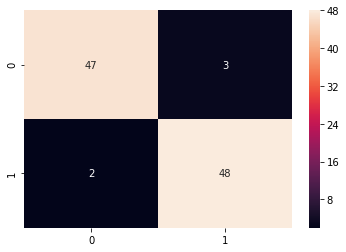

In [23]:
y_predict1 = svc_model1.predict(X_test_scaled)
cm1 = confusion_matrix(y_test, y_predict1)
print(accuracy_score(y_test, y_predict1))
sns.heatmap(cm1,annot=True,fmt="d")

In [24]:
print(classification_report(y_test,y_predict1))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        50
           1       0.94      0.96      0.95        50

   micro avg       0.95      0.95      0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



# IMPROVING THE MODEL - PART 2

In [25]:
#param_grid = {'C': [0.1,1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']} 
#from sklearn.model_selection import GridSearchCV
#grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
#grid.fit(X_train_scaled,y_train)

In [26]:
#grid.best_params_

In [27]:
#grid.best_estimator_

In [28]:
#grid_predictions = grid.predict(X_test_scaled)
#cm2 = confusion_matrix(y_test, grid_predictions)
#print(accuracy_score(y_test,grid_predictions ))
#sns.heatmap(cm2,annot=True,fmt="d")

In [29]:
#print(classification_report(y_test,grid_predictions))